In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Quintile Proportion

In [75]:
df = pd.read_csv('proportions.csv', index_col = 0, parse_dates=['filingDate', 'reportDate'])
df = df[df.reportDate >= '2016-01-01']
df.head()

,reportDate,filingDate,cik,ExcessReturnsEqualWeightedSnP,ExcessReturnsValueWeightedSnP,propLM,propHar,weightedLM,weightedHar
20,2016-03-31,2016-05-09,814453,0.015216,0.012411,0.027910,0.074000,0.029333,0.026957
21,2016-06-30,2016-08-09,814453,0.010468,0.012448,0.026423,0.073618,0.022645,0.021967
22,2016-09-30,2016-11-08,814453,-0.077190,-0.069763,0.028069,0.076594,0.024874,0.025146
23,2016-12-31,2017-03-01,814453,-0.000803,-0.003919,0.028890,0.075044,0.024955,0.027954
24,2017-03-31,2017-05-10,814453,0.001553,-0.002548,0.025452,0.075698,0.030192,0.030750


In [76]:
def dataPartition(df, colnameForBins, colnameForMedian):
    '''
    Given a column name, it partitions the dataframe into quantiles and get the median of each quintile
    '''
    newDf = df.copy()
    quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]
    
    newDf['bins'] = pd.qcut(newDf[colnameForBins], quantiles, labels=['1st', '2nd', '3rd', '4th', '5th'])
    return newDf.groupby('bins').median()[[colnameForMedian]].reset_index()

In [77]:
newDf = df.copy()
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [78]:
newDf['bins'] = pd.qcut(newDf['propLM'], quantiles, labels=['1st', '2nd', '3rd', '4th', '5th'])
newDf[['propLM', 'bins']]

,propLM,bins
20,0.027910,3rd
21,0.026423,3rd
22,0.028069,3rd
23,0.028890,3rd
24,0.025452,2nd
...,...,...
20726,0.020214,1st
20727,0.014241,1st
20728,0.035195,4th
20729,0.023269,2nd


In [79]:
propLM = dataPartition(df, 'propLM', 'ExcessReturnsValueWeightedSnP')
propHar = dataPartition(df, 'propHar', 'ExcessReturnsValueWeightedSnP')
wPropLM = dataPartition(df, 'weightedLM', 'ExcessReturnsValueWeightedSnP')
wPropHar = dataPartition(df, 'weightedHar', 'ExcessReturnsValueWeightedSnP')
toPlot = {'Fin-Neg prop': propLM, 'H4N-Inf prop': propHar, 'tf.idf Fin-Neg prop': wPropLM, 'tf.idf H4N-Inf prop':wPropHar}


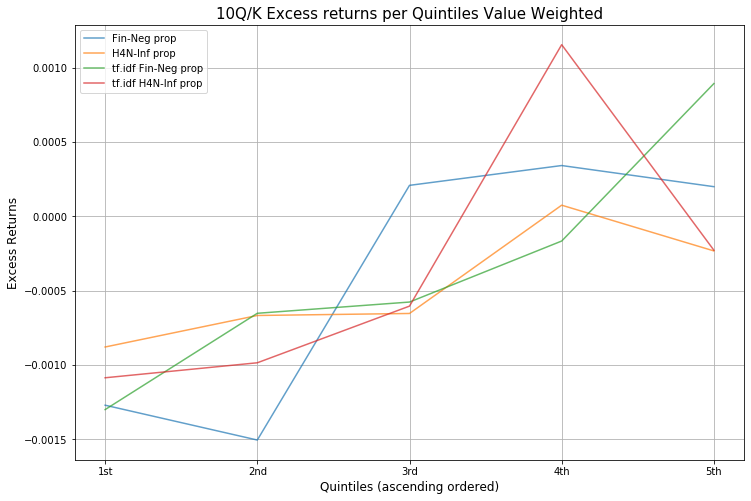

In [80]:
fig, ax = plt.subplots(1, figsize = (12, 8))
for key, value in toPlot.items():
    ax.plot(list(value.iloc[:, 0]), list(value.iloc[:, 1]), label = key, alpha = .7)
    
ax.set_xlabel('Quintiles (ascending ordered)', fontsize=12)
ax.set_ylabel('Excess Returns', fontsize=12)
ax.set_title('10Q/K Excess returns per Quintiles Value Weighted', fontsize=15)
ax.legend()
ax.grid()



# Computing Proportion of Negative Words for a sample stock Amazon

In [82]:
amazon = df[df['cik']== 1018724].reset_index()

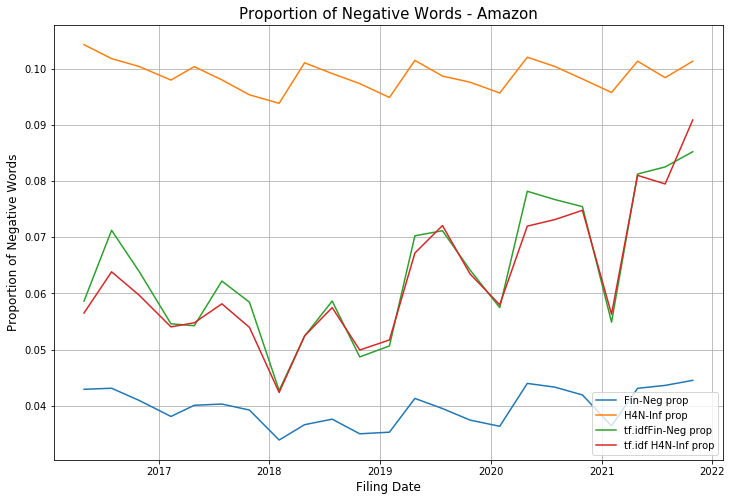

In [88]:
fig, ax = plt.subplots(1, figsize = (12, 8))

ax.plot(np.array(amazon['filingDate']), np.array(amazon['propLM']), label='Fin-Neg prop')
ax.plot(np.array(amazon['filingDate']), np.array(amazon['propHar']), label='H4N-Inf prop')
ax.plot(np.array(amazon['filingDate']), np.array(amazon['weightedLM']), label='tf.idfFin-Neg prop')
ax.plot(np.array(amazon['filingDate']), np.array(amazon['weightedHar']), label='tf.idf H4N-Inf prop')
ax.set_xlabel('Filing Date', fontsize=12)
ax.set_ylabel('Proportion of Negative Words', fontsize=12)
ax.set_title('Proportion of Negative Words - Amazon', fontsize=15)
ax.legend()
ax.grid()